# Crop Classification and Residual Analysis

In [1]:
import pandas as pd
import scipy as sc
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import warnings
warnings.filterwarnings('ignore')

In [2]:
Crops = pd.read_csv('Data/Agosto.csv').iloc[:,1:]

In [3]:
Crops['crop_list']
Active = Crops[Crops['is_active'] == 1]

In [4]:
lottacrop = Active[Active.crop_list.str.contains('OAT')|Active.crop_list.str.contains('SUNFLOWER')  | Active.crop_list.str.contains('ALMOND') | Active.crop_list.str.contains('GRAPE') | Active.crop_list.str.contains('WALNUT') |Active.crop_list.str.contains('RICE') | Active.crop_list.str.contains('ALFALFA')| Active.crop_list.str.contains('ALFALFA') | Active.crop_list.str.contains('CORN')| Active.crop_list.str.contains('WHEAT')| Active.crop_list.str.contains('TOMATO')  | Active.crop_list.str.contains('SAFFLOWER')]

In [5]:
nonorg = lottacrop.drop(lottacrop.crop_list[lottacrop.crop_list.str.contains('ORG')].index)

In [6]:
lottacrop.crop_list[lottacrop['crop_list'].str.contains('ALMOND')] = 'ALMOND'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('GRAPE')] = 'GRAPE'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('OAT')] = 'OAT'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('RICE')] = 'RICE'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('SUNFLOWER')] = 'SUNFLOWER'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('WALNUT')] = 'WALNUT'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('ALFALFA')] = 'ALFALFA'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('CORN')] = 'CORN'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('WHEAT')] = 'WHEAT'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('TOMATO')] = 'TOMATO'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('SAFFLOWER')] = 'SAFFLOWER'

In [7]:
lottacrop['code'] = lottacrop.crop_list.astype('category').cat.codes

In [8]:
crops_list = {"WALNUT":9,"ALFALFA":0,"OAT":4,"GRAPE":3,"ALMOND":1,"WHEAT":10,"RICE":5,"CORN":2,"SAFFLOWER":6, "SUNFLOWER":7, "TOMATO":8}

In [9]:
firstx = lottacrop.iloc[:,1:61].dropna()
secondx = lottacrop.iloc[:,85:-1].dropna()

# Model Selection Process with only July Crops
### All Crops

In [10]:
fullx = firstx.dropna()
fully = lottacrop.loc[fullx.index,'code']
fully.shape
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)

In [11]:
n_neighbors = 25

RFC = RandomForestClassifier()
extra = ExtraTreesClassifier()
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',algorithm='ball_tree')

knn.fit(X_train, Y_train)
extra.fit(X_train,Y_train)
RFC.fit(X_train,Y_train)
svm = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, Y_train)

In [12]:
print(svm.score(X_test,Y_test))
print(knn.score(X_test,Y_test))
print(extra.score(X_test,Y_test))
print(RFC.score(X_test,Y_test))

0.6061776061776062
0.8400096525096525
0.8614864864864865
0.8571428571428571


In [13]:
entropy=sc.stats.entropy(extra.predict_proba(X_test))
entropy

array([6.6861861 , 6.40544123, 5.41392678, 5.98269005, 5.47142313,
       5.85739069, 5.44172261, 6.47405186, 6.84467197, 5.98457432,
       6.56550574])

In [14]:
confusion_matrix(Y_test,extra.predict(X_test))

array([[550,  11,   0,   8,   6,   0,   1,   5,  13,   0,  10],
       [ 17, 366,   1,   3,   8,   0,   0,   3,   3,   6,   9],
       [  5,   4, 130,   4,   7,   1,   2,   4,   9,   8,   4],
       [ 28,  22,   2, 209,   5,   0,   1,   4,   6,   5,   8],
       [  2,   6,   0,   0, 103,   2,   2,   0,   0,   0,  24],
       [  5,   1,   2,   4,   2, 300,   5,   1,   2,   0,   4],
       [  6,   2,   4,   1,   3,   1, 131,   2,   4,   1,  12],
       [  7,   7,   7,   0,   1,   4,   2, 393,  24,   0,   3],
       [ 11,   4,   8,   2,   2,   3,   1,  36, 694,   2,  10],
       [ 17,  31,   0,   4,   1,   0,   0,   0,   0, 181,   1],
       [ 10,   8,   3,   4,   8,   0,   3,   6,  12,   1, 513]])

In [15]:
confusion_matrix(Y_test,RFC.predict(X_test))

array([[543,   7,   1,   7,   6,   1,   2,   3,  14,   6,  14],
       [ 18, 363,   1,  13,   4,   0,   0,   1,   2,   5,   9],
       [  5,   5, 123,   2,   6,   1,   2,  10,  11,   8,   5],
       [ 32,  20,   2, 205,   0,   0,   0,   2,   9,   7,  13],
       [  0,   2,   3,   1, 108,   0,   1,   0,   0,   0,  24],
       [  0,   2,   5,   0,   1, 297,   6,   0,   4,   3,   8],
       [  1,   3,   5,   1,   4,   0, 129,   3,   9,   1,  11],
       [ 10,   1,   6,   0,   1,   7,   3, 392,  24,   0,   4],
       [  7,   7,   9,   2,   0,   4,   3,  33, 698,   1,   9],
       [ 13,  25,   1,   6,   3,   3,   0,   0,   1, 181,   2],
       [  7,   8,   5,   2,   9,   0,   4,   7,  11,   2, 513]])

### Non-Organic

In [16]:
firstx = nonorg.iloc[:,1:61].dropna()
fullx = firstx.dropna()
fully = lottacrop.loc[fullx.index,'code']
fully.shape
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)

In [17]:
n_neighbors = 25

RFC = RandomForestClassifier()
extra = ExtraTreesClassifier()
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',algorithm='ball_tree')

knn.fit(X_train, Y_train)
extra.fit(X_train,Y_train)
RFC.fit(X_train,Y_train)
svm = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, Y_train)

In [18]:
print(svm.score(X_test,Y_test))
print(knn.score(X_test,Y_test))
print(extra.score(X_test,Y_test))
print(RFC.score(X_test,Y_test))

0.55625
0.84725
0.8665
0.858


In [19]:
entropy=sc.stats.entropy(extra.predict_proba(X_test))
entropy

array([6.65396443, 6.42124452, 5.3799943 , 5.97153564, 5.28113064,
       5.84344983, 5.47476697, 6.50056152, 6.75684671, 5.85509528,
       6.49363777])

In [20]:
confusion_matrix(Y_test,extra.predict(X_test))

array([[541,   6,   1,  12,   2,   0,   3,   5,   9,   1,  13],
       [ 13, 386,   3,  11,   1,   0,   1,   1,   3,   3,  11],
       [  5,   2, 123,   1,   1,   7,   1,   4,  10,   5,   5],
       [ 19,  15,   0, 208,   0,   0,   3,   6,   9,   5,   6],
       [  8,   5,   0,   2, 105,   0,   2,   0,   0,   2,  16],
       [  2,   0,   4,   1,   0, 288,   3,  10,   3,   3,   0],
       [  7,   5,   2,   3,   1,   1, 109,   3,   3,   0,  14],
       [  8,  14,   2,   3,   2,   5,   8, 425,  25,   0,   5],
       [  7,   2,   5,   3,   0,   2,   1,  27, 620,   0,   6],
       [ 23,  26,   1,   5,   1,   1,   0,   2,   6, 167,   1],
       [  9,   8,   2,   0,   2,   0,   6,   3,  10,   0, 494]])

In [21]:
confusion_matrix(Y_test,RFC.predict(X_test))

array([[533,  12,   1,   5,   3,   0,   4,   4,  14,   3,  14],
       [ 14, 370,   1,  16,   4,   0,   0,   2,   4,   8,  14],
       [  6,   1, 118,   1,   3,   7,   1,   6,  11,   4,   6],
       [ 27,  12,   1, 212,   1,   0,   0,   2,   9,   2,   5],
       [  5,  11,   0,   0,  98,   0,   2,   1,   0,   2,  21],
       [  4,   3,   4,   0,   1, 288,   3,   7,   0,   4,   0],
       [  5,   3,   2,   3,   1,   1, 111,   3,   2,   0,  17],
       [ 12,  11,   2,   0,   1,   5,   4, 425,  30,   0,   7],
       [  8,   0,   5,   2,   0,   2,   0,  24, 621,   1,  10],
       [ 21,  31,   1,   7,   0,   4,   0,   1,   4, 164,   0],
       [  8,   5,   2,   1,   6,   0,   7,   3,  10,   0, 492]])

# Model Selection Process with all Crops (July and August)

In [22]:
fullx = firstx.join(secondx).dropna()
fully = lottacrop.loc[fullx.index,'code']
fully.shape
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)

In [23]:
n_neighbors = 25

RFC = RandomForestClassifier()
extra = ExtraTreesClassifier()
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',algorithm='ball_tree')

knn.fit(X_train, Y_train)
extra.fit(X_train,Y_train)
RFC.fit(X_train,Y_train)
svm = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, Y_train)

In [24]:
print(svm.score(X_test,Y_test))
print(knn.score(X_test,Y_test))
print(extra.score(X_test,Y_test))
print(RFC.score(X_test,Y_test))

0.716
0.86575
0.87875
0.87725


In [25]:
entropy=sc.stats.entropy(extra.predict_proba(X_test))
entropy

array([6.64031096, 6.39602958, 5.37327784, 5.92426512, 5.27127414,
       5.81348155, 5.31962644, 6.50516117, 6.7530588 , 5.86379834,
       6.4273698 ])

In [26]:
confusion_matrix(Y_test,extra.predict(X_test))

array([[571,   4,   1,   4,   2,   0,   1,   2,   5,   0,   5],
       [  4, 390,   0,   5,   8,   1,   0,   3,   4,   4,   9],
       [  5,   3, 120,   1,   1,   1,   4,   8,   9,   3,   6],
       [ 17,  30,   0, 211,   2,   0,   0,   4,   0,   5,   8],
       [  6,  10,   0,   0,  85,   2,   0,   0,   0,   3,  16],
       [  3,   0,   0,   1,   1, 283,   2,   1,   0,   2,   3],
       [  8,   0,   6,   1,   1,   1, 117,   6,   7,   0,   4],
       [  9,   5,   6,   0,   1,   7,   4, 455,  29,   2,   2],
       [ 11,   1,  13,   0,   0,   1,   0,  35, 625,   1,  10],
       [  6,  30,   0,   7,   0,   1,   0,   1,   1, 191,   3],
       [  4,   7,   3,   1,  11,   0,   4,   5,   9,   2, 467]])

In [27]:
confusion_matrix(Y_test,RFC.predict(X_test))

array([[566,   5,   0,   4,   3,   0,   1,   1,   7,   0,   8],
       [  3, 391,   0,   6,   2,   0,   0,   6,   2,   5,  13],
       [  5,   6, 117,   0,   0,   1,   3,   8,  13,   3,   5],
       [ 18,  26,   1, 211,   2,   0,   1,   3,   0,   6,   9],
       [  5,   7,   0,   2,  92,   4,   1,   2,   0,   0,   9],
       [  3,   0,   0,   0,   4, 284,   2,   2,   0,   0,   1],
       [  5,   1,   0,   1,   1,   1, 114,   9,  11,   1,   7],
       [ 11,   1,   4,   0,   3,   7,   4, 448,  38,   1,   3],
       [ 10,   1,  11,   0,   1,   1,   0,  36, 626,   0,  11],
       [  1,  26,   1,  10,   1,   4,   1,   2,   3, 188,   3],
       [  3,   7,   1,   0,  11,   0,   4,   6,   9,   0, 472]])

# Using Non-Organic Data

In [28]:
nonorg.crop_list[nonorg['crop_list'].str.contains('ALMOND')] = 'ALMOND'
nonorg.crop_list[nonorg['crop_list'].str.contains('GRAPE')] = 'GRAPE'
nonorg.crop_list[nonorg['crop_list'].str.contains('OAT')] = 'OAT'
nonorg.crop_list[nonorg['crop_list'].str.contains('RICE')] = 'RICE'
nonorg.crop_list[nonorg['crop_list'].str.contains('SUNFLOWER')] = 'SUNFLOWER'
nonorg.crop_list[nonorg['crop_list'].str.contains('WALNUT')] = 'WALNUT'
nonorg.crop_list[nonorg['crop_list'].str.contains('ALFALFA')] = 'ALFALFA'
nonorg.crop_list[nonorg['crop_list'].str.contains('CORN')] = 'CORN'
nonorg.crop_list[nonorg['crop_list'].str.contains('WHEAT')] = 'WHEAT'
nonorg.crop_list[nonorg['crop_list'].str.contains('TOMATO')] = 'TOMATO'
nonorg.crop_list[nonorg['crop_list'].str.contains('SAFFLOWER')] = 'SAFFLOWER'

In [29]:
nonorg['code'] = nonorg.crop_list.astype('category').cat.codes

In [30]:
firstx = nonorg.iloc[:,1:61].dropna()
secondx = nonorg.iloc[:,85:-1].dropna()

In [31]:
fullx = firstx.join(secondx).dropna()
fully = nonorg.loc[fullx.index,'code']
fully.shape
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)

In [32]:
n_neighbors = 25

RFC = RandomForestClassifier()
extra = ExtraTreesClassifier()
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',algorithm='ball_tree')

knn.fit(X_train, Y_train)
extra.fit(X_train,Y_train)
RFC.fit(X_train,Y_train)
svm = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, Y_train)

In [33]:
print(svm.score(X_test,Y_test))
print(knn.score(X_test,Y_test))
print(extra.score(X_test,Y_test))
print(RFC.score(X_test,Y_test))

0.62025
0.871
0.88575
0.87525


In [34]:
entropy=sc.stats.entropy(extra.predict_proba(X_test))
entropy

array([6.58989289, 6.45690067, 5.42344186, 6.00560748, 5.36318454,
       5.84304487, 5.33458371, 6.48498022, 6.74506062, 5.79744886,
       6.43775856])

In [35]:
confusion_matrix(Y_test,extra.predict(X_test))

array([[557,   6,   0,   4,   7,   0,   2,   2,  11,   0,   6],
       [  7, 407,   0,   5,   3,   0,   0,   0,   0,   5,   7],
       [  0,   3, 120,   1,   1,   0,   9,   5,   7,   1,   3],
       [ 10,  20,   0, 234,   1,   0,   1,   0,   2,   2,   3],
       [  4,   9,   1,   2,  95,   2,   3,   0,   0,   1,  19],
       [  1,   1,   0,   1,   1, 301,   3,   2,   0,   0,   4],
       [  4,   0,   5,   0,   4,   0, 121,   5,   1,   0,  12],
       [ 10,   3,   7,   2,   1,   6,   7, 445,  16,   2,   6],
       [  9,   4,   9,   3,   0,   0,   0,  37, 635,   0,   6],
       [ 13,  29,   2,  14,   2,   0,   0,   0,   1, 176,   4],
       [  3,   4,   3,   2,  10,   1,   5,   6,  11,   0, 452]])

In [36]:
confusion_matrix(Y_test,RFC.predict(X_test))

array([[555,   6,   0,   5,   6,   0,   1,   6,   7,   0,   9],
       [  3, 395,   0,   9,   6,   0,   1,   0,   0,   8,  12],
       [  2,   2, 113,   0,   0,   0,   7,   8,  11,   4,   3],
       [ 15,  21,   1, 223,   1,   0,   0,   0,   5,   6,   1],
       [  5,   6,   0,   1, 100,   2,   2,   0,   0,   0,  20],
       [  1,   3,   3,   0,   0, 297,   3,   2,   0,   1,   4],
       [  4,   2,   5,   2,   2,   0, 121,   2,   0,   2,  12],
       [ 10,   2,   8,   0,   2,   5,   3, 440,  31,   1,   3],
       [ 10,   1,   8,   0,   0,   0,   2,  36, 634,   0,  12],
       [ 12,  30,   1,  12,   4,   0,   0,   2,   2, 175,   3],
       [  2,   8,   3,   1,  14,   1,   4,   2,  14,   0, 448]])

## Residual Analysis
#### Entropy Analysis for Extra Trees Classifier

In [37]:
misclassified = np.where(Y_test != extra.predict(X_test))
classified = np.where(Y_test == extra.predict(X_test))

In [38]:
def logfcn(x):
    c = x.copy()
    c[np.where(c == 0.0)] = 1 
    return np.log(c)

In [39]:
pk = extra.predict_proba(X_test)
d = pk * logfcn(pk)
entropy = -1*np.sum(d, axis = 1)

In [40]:
import geopandas as gpd

In [41]:
cropfields = gpd.read_file("Crops_2016/Crops_2016_26910.shp")
cropfields1 = cropfields[["OBJECTID", "geometry"]]

In [42]:
test_df = lottacrop.loc[X_test.index]
test_df['entropy'] = entropy
testfields = gpd.GeoDataFrame(test_df.merge(cropfields1, on = 'OBJECTID', how = 'left'))

In [43]:
testfields["geometry"] = testfields["geometry_y"]
testfields = testfields.drop(columns = ["geometry_y"])
testfields.crs = {'init': 'epsg:26910'}
testfields = testfields.to_crs("+proj=longlat +datum=WGS84 +no_defs")

In [44]:
counties = gpd.read_file("cb_2016_us_county_500k/cb_2016_us_county_500k.shp")
cali = counties[counties.STATEFP == "06"]
keep = ["Yolo", "Lake", "Colusa", "Sutter", "Sacramento", "Solano", "Napa"]
yolo = cali[cali.NAME.isin(keep)]

Text(20.75,0.5,'Longitude')

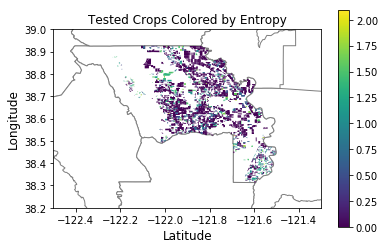

In [103]:
ax = yolo.plot(color = "white", edgecolor = "gray")
testfields.plot(ax =ax, column = 'entropy', legend = True)
ax.set_xlim([-122.5, -121.3])
ax.set_ylim([38.2, 39])
ax.set_title("Tested Crops Colored by Entropy", fontsize = 12)
ax.set_xlabel("Latitude", fontsize = 12)
ax.set_ylabel("Longitude", fontsize = 12)

In [47]:
misclass_test = testfields.loc[misclassified]

Text(20.75,0.5,'Longitude')

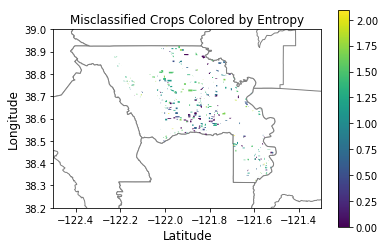

In [102]:
ax = yolo.plot(color = "white", edgecolor = "gray")
misclass_test.plot(ax =ax, column = 'entropy', legend = True)
ax.set_xlim([-122.5, -121.3])
ax.set_ylim([38.2, 39])
ax.set_title("Misclassified Crops Colored by Entropy", fontsize = 12)
ax.set_xlabel("Latitude", fontsize = 12)
ax.set_ylabel("Longitude", fontsize = 12)

In [50]:
class_test = testfields.loc[classified]

Text(20.75,0.5,'Longitude')

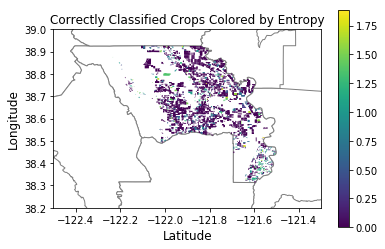

In [109]:
#fig,ax=plt.subplots()
ax = yolo.plot(color = "white", edgecolor = "gray", legend = False)
class_test.plot(ax =ax, column = 'entropy', legend = True)
ax.set_xlim([-122.5, -121.3])
ax.set_ylim([38.2, 39])
ax.set_title("Correctly Classified Crops Colored by Entropy", fontsize = 12)
ax.set_xlabel("Latitude", fontsize = 12)
ax.set_ylabel("Longitude", fontsize = 12)

In [52]:
np.mean(misclass_test["entropy"])

0.9411720756993583

In [53]:
np.std(misclass_test["entropy"])

0.5931369046017123

In [54]:
np.mean(class_test["entropy"])

0.1729277818693619

In [55]:
np.std(class_test["entropy"])

0.3823402374774141